In [0]:
import os
os.chdir("./drive/My Drive/EVA/ULTRON-VISION/ultron-vision")

In [2]:
!nvidia-smi

Fri Jun 12 14:41:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    42W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
curr_dir = os.path.abspath(".")
curr_dir

'/content/drive/My Drive/EVA/ULTRON-VISION/ultron-vision'

In [0]:
import sys
sys.path.append(os.path.join(curr_dir))

In [0]:
# !pip install -r requirements.txt

In [0]:
# import agent libraries
from agents import *
from inference import *
from utils.config import process_config

In [0]:
# get config of agent
config_path = "configs/cifar10_config.json"

In [8]:
config = process_config(config_path)

[INFO]: Hi, This is Ultron. Nice to meet you!!!
[INFO]: Saving Configuration
[INFO]: Configurations are successfully processed and dirs are created.
[INFO]: The pipeline of the project will begin now.


****************************
CONFIGURATION OF THIS EXPERIMENT
****************************
{'agent': 'Cifar10Agent',
 'batch_size': 64,
 'checkpoint_file': 'checkpoint.pth.tar',
 'epochs': 50,
 'exp_name': 'cifar10_exp-009',
 'gpu_device': 0,
 'inference_agent': 'Cifar10IAgent',
 'input_size': [3, 32, 32],
 'interpret_image': True,
 'l1_decay': 1e-06,
 'l2_decay': 0.005,
 'learning_rate': 0.1,
 'load_checkpoint': True,
 'mean': [0.4914, 0.4822, 0.4465],
 'model_stats_file': 'stats.json',
 'momentum': 0.9,
 'num_workers': 4,
 'pin_memory': True,
 'save_checkpoint': True,
 'scheduler': {'kwargs': {'anneal_strategy': 'cos',
                          'base_momentum': 0.85,
                          'cycle_momentum': True,
                          'div_factor': 10,
                          'final_div_factor': 10000.0,
                          'last_epoch': -1,
                          'max_momentum': 0.95,
                          'pct_start': 0.3},
               'name': 'OneCycleLR'}

# EXPERIMENT 1

high batch size, increasing for 20% of iterations, high l2 decay = 0.005

In [0]:
# as we are using one cycle policy we are defining arguments for the scheduler for testing
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 25
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 1000

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


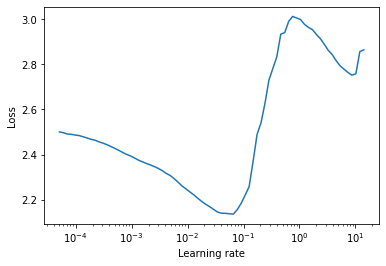

[INFO]: Learning rate with minimum loss : 0.06579332246575675
[INFO]: Setting optimizer to optim learning rate : 0.07
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128

In [10]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [11]:
# run for few epochs and check the graph
agent.run()

[INFO]: Current lr value = 0.007000000000000006
loss = 11.021600723266602 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0246	ACC : 31.3280
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0034	ACC : 39.3100
[INFO]: Current lr value = 0.013039776025527881
loss = 11.270708084106445 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.90it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0225	ACC : 41.2720
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0031	ACC : 45.2500
[INFO]: Current lr value = 0.028842983820299366
loss = 10.133003234863281 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0211	ACC : 47.6820
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0027	ACC : 52.7200
[INFO]: Current lr value = 0.04834944334842264
loss = 9.891036987304688 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0197	ACC : 53.1960
[INFO]: Saved B

In [12]:
agent.finalize()

[INFO]: Please wait while finalizing the operations.. Thank you


In [13]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)

[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


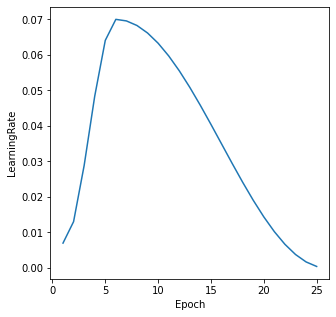

[INFO]: Learning Rate Graph saved.


In [14]:
iagent.plot_lr_graph()

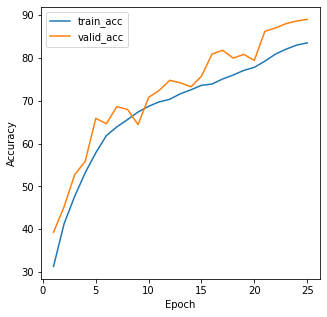

[INFO]: Accuracy Graph saved.


In [16]:
iagent.plot_accuracy_graph()

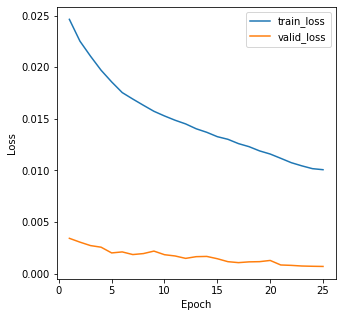

[INFO]: Loss Graph saved.


In [18]:
iagent.plot_loss_graph()

This is the case of underfittin model, as the graph is decreasing and not showing horizontal path at end.

# EXPERIMENT 2

high batch size, increasing for 20% of iterations, 
low l2 decay = 0.0001

In [0]:
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 25
config["l2_decay"] = 1e-4
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 1000
config["scheduler"]["kwargs"]["epochs"] = 10
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


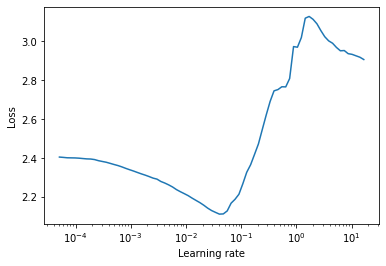

[INFO]: Learning rate with minimum loss : 0.04037017258596554
[INFO]: Setting optimizer to optim learning rate : 0.04
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128

In [10]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [11]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(time.time()-start)

[INFO]: Current lr value = 0.004
loss = 7.35660982131958 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0157	ACC : 31.0840
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0033	ACC : 39.4500
[INFO]: Current lr value = 0.022092307692307696
loss = 6.915872573852539 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0135	ACC : 42.2760
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0030	ACC : 47.7100
[INFO]: Current lr value = 0.03994898469387755
loss = 5.752560615539551 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0118	ACC : 50.9620
[INFO]: VALID EPOCH : 2	LOSS : 0.0038	ACC : 43.4300
[INFO]: Current lr value = 0.034949484693877556
loss = 5.177650451660156 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.87it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0107	ACC : 56.0460
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 3	LOSS : 0.0

329.0543351173401


In [12]:
agent.finalize()

[INFO]: Please wait while finalizing the operations.. Thank you


In [13]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)

[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


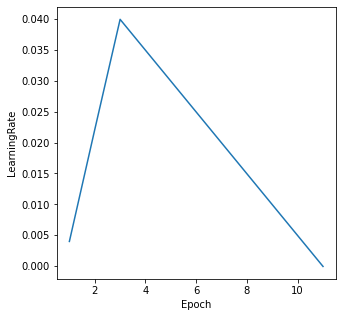

[INFO]: Learning Rate Graph saved.


In [14]:
iagent.plot_lr_graph()

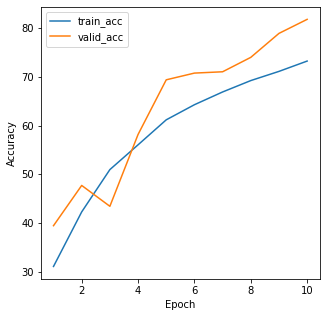

[INFO]: Accuracy Graph saved.


In [16]:
iagent.plot_accuracy_graph()

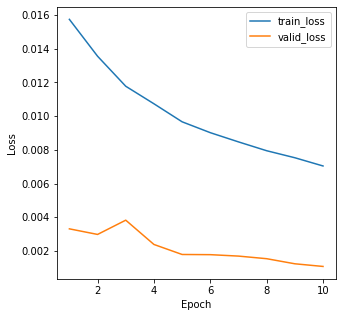

[INFO]: Loss Graph saved.


In [17]:
iagent.plot_loss_graph()

For higher learning rate we can see overfitting in graph.

# EXPERIMENT 3

high batch size, increasing for 30% of iterations, 
low l2 decay = 0.0001

In [0]:
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.3
config["epochs"] = 25
config["l2_decay"] = 1e-4
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 100
config["scheduler"]["kwargs"]["epochs"] = 15
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


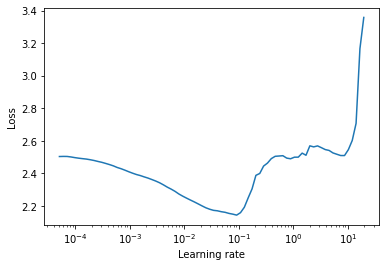

[INFO]: Learning rate with minimum loss : 0.0911162756115489
[INFO]: Setting optimizer to optim learning rate : 0.09
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128

In [20]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [21]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(time.time()-start)

[INFO]: Current lr value = 0.009
loss = 7.3469014167785645 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.88it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0158	ACC : 30.8980
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0035	ACC : 37.6200
[INFO]: Current lr value = 0.027040909090909088
loss = 6.338674545288086 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0135	ACC : 41.9340
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0032	ACC : 44.1800
[INFO]: Current lr value = 0.04508181818181818
loss = 5.736429691314697 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0122	ACC : 48.8760
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0028	ACC : 51.7400
[INFO]: Current lr value = 0.06312272727272727
loss = 6.0186285972595215 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0112	ACC : 54.0460
[INFO]: Saved Best Model
[INFO]:

517.9666950702667


In [22]:
agent.finalize()

[INFO]: Please wait while finalizing the operations.. Thank you


In [23]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)

[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


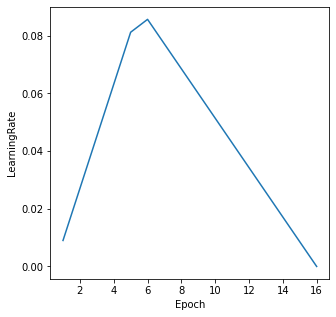

[INFO]: Learning Rate Graph saved.


In [24]:
iagent.plot_lr_graph()

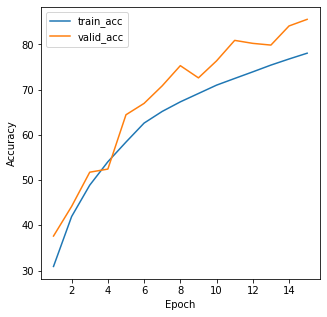

[INFO]: Accuracy Graph saved.


In [25]:
iagent.plot_accuracy_graph()

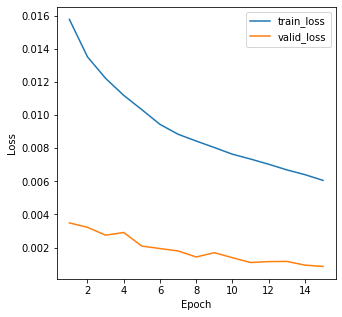

[INFO]: Loss Graph saved.


In [26]:
iagent.plot_loss_graph()

# EXPERIMENT 4

high batch size, increasing for 20% of iterations, high l2 decay = 0.005, increase number epochs 

In [0]:
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 25
config["l2_decay"] = 0.005
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 100
config["scheduler"]["kwargs"]["epochs"] = 15
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


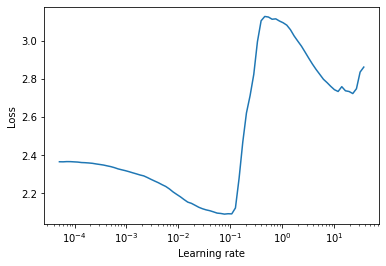

[INFO]: Learning rate with minimum loss : 0.07742636826811275
[INFO]: Setting optimizer to optim learning rate : 0.08
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128

In [28]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [29]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(time.time()-start)

[INFO]: Current lr value = 0.008
loss = 12.52254867553711 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.85it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0250	ACC : 29.5660
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0032	ACC : 41.4700
[INFO]: Current lr value = 0.032081911262798635
loss = 11.344340324401855 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.81it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0226	ACC : 40.3860
[INFO]: VALID EPOCH : 1	LOSS : 0.0049	ACC : 25.2000
[INFO]: Current lr value = 0.05616382252559727
loss = 10.225568771362305 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0211	ACC : 46.6780
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0025	ACC : 55.1200
[INFO]: Current lr value = 0.07993204081632653
loss = 9.840555191040039 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0196	ACC : 53.1900
[INFO]: VALID EPOCH : 3	LOSS : 0.0027	ACC : 52.2800
[INFO

522.677493095398


In [30]:
agent.finalize()

[INFO]: Please wait while finalizing the operations.. Thank you


In [31]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)

[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


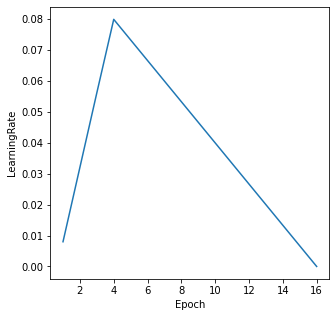

[INFO]: Learning Rate Graph saved.


In [32]:
iagent.plot_lr_graph()

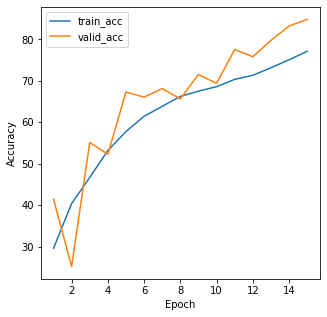

[INFO]: Accuracy Graph saved.


In [33]:
iagent.plot_accuracy_graph()

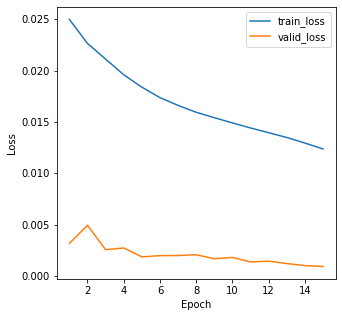

[INFO]: Loss Graph saved.


In [34]:
iagent.plot_loss_graph()

for first 2 epochs, model sees overfitting.

# EXPERIMENT 5

high batch size, increasing for 20% of iterations, 
low l2 decay = 0.0001, epochs = 15
div_factor decreased = 5 

In [0]:
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 25
config["l2_decay"] = 0.0001
config["scheduler"]["kwargs"]["div_factor"] = 5
config["scheduler"]["kwargs"]["final_div_factor"] = 100
config["scheduler"]["kwargs"]["epochs"] = 15
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


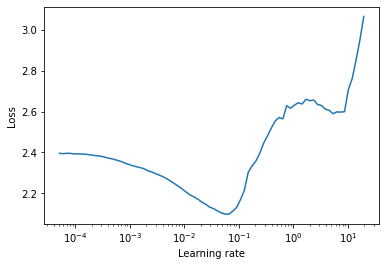

[INFO]: Learning rate with minimum loss : 0.05590810182512224
[INFO]: Setting optimizer to optim learning rate : 0.06
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128

In [38]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [39]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(time.time()-start)

[INFO]: Current lr value = 0.012
loss = 7.976589202880859 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0170	ACC : 26.6800
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0040	ACC : 34.5900
[INFO]: Current lr value = 0.028054607508532423
loss = 6.638611316680908 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0145	ACC : 37.4220
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0029	ACC : 46.9600
[INFO]: Current lr value = 0.04410921501706484
loss = 6.52183198928833 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0132	ACC : 44.3400
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0027	ACC : 51.2700
[INFO]: Current lr value = 0.059949081632653056
loss = 5.846279621124268 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.79it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0121	ACC : 49.9500
[INFO]: Saved Best Model
[INFO]: V

533.8307394981384


In [40]:
agent.finalize()

[INFO]: Please wait while finalizing the operations.. Thank you


In [41]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)

[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


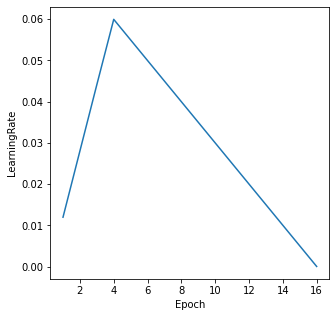

[INFO]: Learning Rate Graph saved.


In [42]:
iagent.plot_lr_graph()

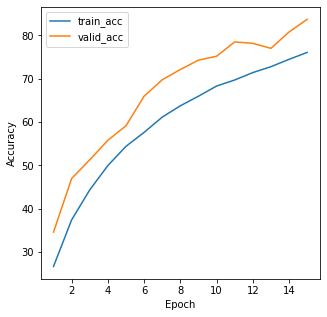

[INFO]: Accuracy Graph saved.


In [43]:
iagent.plot_accuracy_graph()

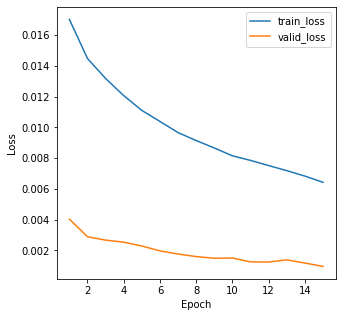

[INFO]: Loss Graph saved.


In [44]:
iagent.plot_loss_graph()

# EXPERIMENT 6

In [0]:
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 25
config["l2_decay"] = 0.0001
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 1000
config["scheduler"]["kwargs"]["epochs"] = 25
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


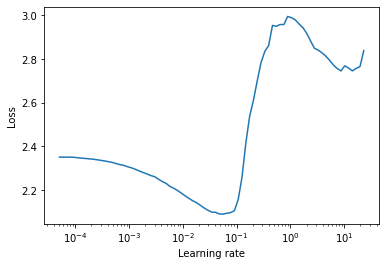

[INFO]: Learning rate with minimum loss : 0.05590810182512224
[INFO]: Setting optimizer to optim learning rate : 0.06
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128

In [46]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [47]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(time.time()-start)

[INFO]: Current lr value = 0.006
loss = 7.368895053863525 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.83it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0156	ACC : 31.4200
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0031	ACC : 44.4200
[INFO]: Current lr value = 0.01682208588957055
loss = 6.3687591552734375 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.84it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0135	ACC : 42.5100
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0029	ACC : 46.8200
[INFO]: Current lr value = 0.0276441717791411
loss = 6.131869316101074 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.82it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0120	ACC : 49.8760
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0024	ACC : 56.0200
[INFO]: Current lr value = 0.03846625766871165
loss = 5.538270473480225 batch_id = 97: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0110	ACC : 55.0660
[INFO]: Saved Best Model
[INFO]: VA

1130.6923246383667


In [48]:
agent.finalize()

[INFO]: Please wait while finalizing the operations.. Thank you


In [49]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)

[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


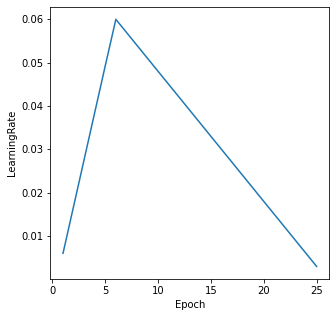

[INFO]: Learning Rate Graph saved.


In [50]:
iagent.plot_lr_graph()

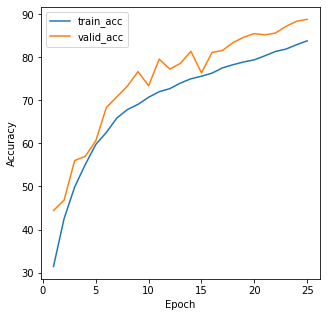

[INFO]: Accuracy Graph saved.


In [51]:
iagent.plot_accuracy_graph()

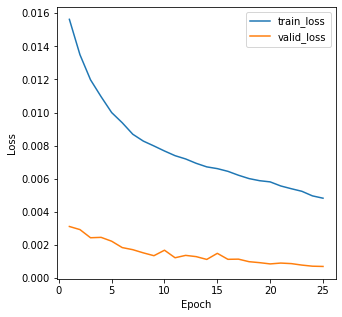

[INFO]: Loss Graph saved.


In [52]:
iagent.plot_loss_graph()